# **What is Class/Data Imbalance?**

In simple terms ***class imbalance*** is the situation where the classes in your dataset are not represented equally.

That's is, one class is having higher distribution than the other.

Example, let's say you have a dataset and you want to predict whether a person is ***vegeterrian*** or ***non-vegeterrian***. 
Now, let's say you have **500** ***vegeterrians*** in your target class and **50** ***non-vegeterrians***. If you build model on this dataset to predict whether a person is ***vegeterrian*** or ***non-vegeterrian***, what do you think will happen?

## **The Problem with Imbalance Dataset**

You will end up predicting almost every person as vegeterrian because your algorithm will memorise the ***vegeterrian*** class which is having higher distribution. 

Data Imbalance is a common problem in machine learning. Again, there are problems where a class imbalance is not just common, but it is ideally expected to happen that way. For instance, datasets that are used for such cases as predicting whether a certain transaction is fraudulent or not. The vast majority of the transactions will be in the **“Not-Fraud”** class and a very small minority will be in the **“Fraud”** class.


### Let's confirm this on **Imbalance Dataset**

We will be using the [credit card fraud detection dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/home) to demonstrate this.

In [1]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:

## let's load our dataset

df=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check Distribution of **Class**

In [4]:

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

from the above, we can see that most of the transactions are non-fruadulent transactions while only a few are fraudulent transactions.

This is a clear example of data imbalance. If we try to build a model on this dataset without dealing with the imbalance of the classes(fraud and non-fraud transactions), our model will end up memorising and predicting the non-fraud transactions, as it will try to figure out that in this case the best scenario to get a higher accuracy is to predict the non-fraudulent transactions.

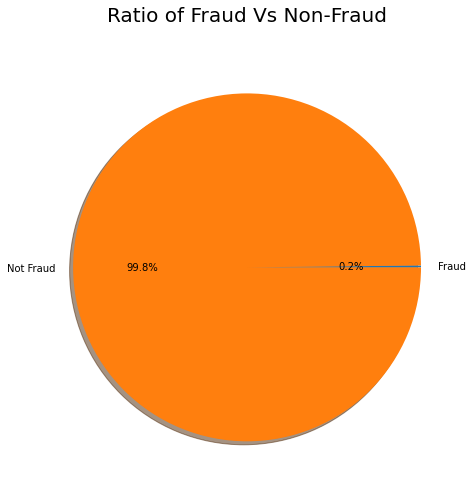

In [5]:

fraud =len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

<br>

**Let's try to build a model on the imbalance dataset and see our result**

In [6]:
pd.isnull(df).sum() > 0

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
df = df.dropna(how='any',axis=0) 

In [8]:

pd.isnull(df).sum() > 0

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Dummy Classifier

In [9]:
# Separate input features and target
y = df['Class']
X = df.drop('Class', axis=1)

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# DummyClassifier 
model = DummyClassifier(strategy='most_frequent')

#train the model
model.fit(X_train, y_train)

#make some predictions
dummyPred = model.predict(X_test)

In [11]:
# checking unique labels
print('Unique predicted labels: ', (np.unique(dummyPred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummyPred))

Unique predicted labels:  [0]
Test score:  0.9984129659279234


<br>

### **Let's try with one more algorithm**: Logistic Regression

In [12]:

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:

# Predict on training set
logistic_pred = logistic.predict(X_test)

# Checking accuracy
accuracy_score(y_test, logistic_pred)


0.9991432824920649

Our model is acheiving almost 100%. This is complete overfitting. Our model has memorised the dominant class and is able to perform so well. However, this will fail if we take it to production. We want a model that can generalise well, even if the fraud cases are few, we want a model that can capture them, else there's no point building the model in the first place.

<br>

# Dealing with **Imbalance Data**

There are several methods that we can use to deal with **Imbalance Data**.

We will take a look at some of the popular ones

## 1. **Adding More Data**

Our data is imbalace because we have more samples of one class than the other.

If we can collect more data and explore more of the other classes(in this case the fraudulent transactions) then we will be to approach a balanced dataset.

## 2. **Change Your Performance Metrics**

Accuracy is not the ultimate performance metrics and infact in the case of imbalace dataset, it might not be appropriate at all.

Trying different performance metrics that can provide more insights into the performance of the model. Among these metrics are:

1. **Confusion Matrix:** A matrix showing correct predictions and the types of incorrect predictions made
   
2. **Precision:** A measure of the exactness of classifiers.
   
3. **Recall:** A measure of the completeness of classifiers.
4. **F1 Score (or F-score):** A weighted average of precision and recall.

### **Let's apply some of these Performance Metrics**

#### **Confusion Metrics**

In [14]:

from sklearn.metrics import confusion_matrix



pd.DataFrame(confusion_matrix(y_test, logistic_pred))

,0,1
0,71064,25
1,36,77


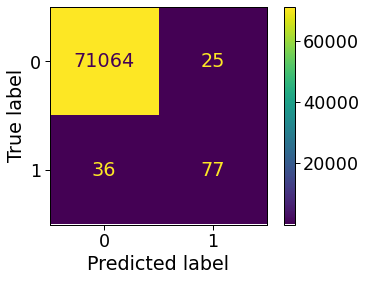

In [15]:

from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logistic, X_test, y_test)  
plt.show() 

We can see that our model is predicting most of the **Os(i.e non-fruad cases)** and less of the **1s(fraud cases)**

#### **F1-Score And Recall**

In [16]:

# f1 score
f1=f1_score(y_test, logistic_pred)
print('F1-Score is:',f1)
# recall score
recall=recall_score(y_test, logistic_pred)
print('Recall is:',recall)

F1-Score is: 0.7162790697674417
Recall is: 0.6814159292035398


Not good scores. We expect our **F1-Score** to be very close to one, considering the performance, but it turned out that that is not the case.

We also wanted to see a **recall** closer to 100% or 1 but as can be seen above, it is not the case, we got 69% or 6.9 which is low considering our model accuracy being almost 100% or 1. 

From this, we can see that, **Accuracy** was a deceptive measure of performance.

## 3. **Change the algorithm**

Thankfully there are numerous algorithms to try out. If one algorithm is not performing well or is not meeting our expectations, we can still try different algorithms to see how well they are performing.

We will consider a **Random Forest** algorithm as it usually performs better as against a single algorithm.

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Initialisation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.9995505744220669

In [19]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,71082,7
1,25,88


In [20]:

# f1 score
f1=f1_score(y_test, rfc_pred)
print('F1-Score is:',f1)
# recall score
recall=recall_score(y_test, rfc_pred)
print('Recall is:',recall)

F1-Score is: 0.8461538461538461
Recall is: 0.7787610619469026


We can see some improvements in F1-score and Recall score after we changed the algrithm. 

## 4. **Resampling Techniques**

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.


1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

We will see how each of these techniques are used below.

## **Upsampling/OverSampling**

In upsampling or oversampling, we increase the number of samples in minority class to match up with the number of samples of the majority class.

That is, we take the minority class and try to create new samples that could match up to the length of the majority samples.

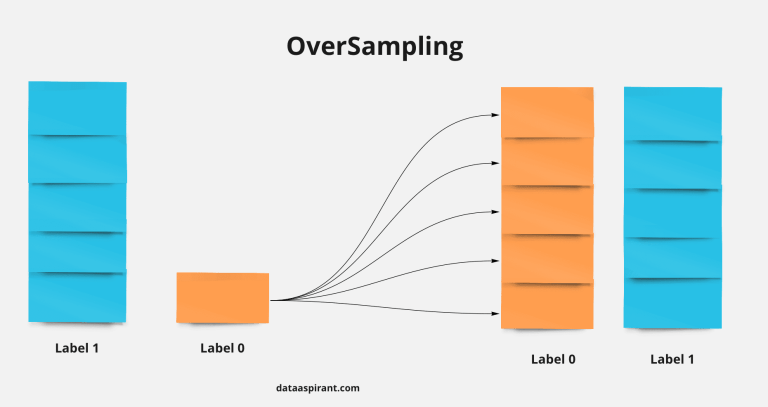

**Implementation Using Resample**

In [21]:

# separate minority and majority classes
from sklearn.utils import resample

not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# upsample minority
fraud_data_upsampled = resample(fraud,#==87
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), #===23235, # match number in majority class
                          random_state=67) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_data_upsampled])

# check new class counts
upsampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<br>

<br>

**Alternatively**

#### *We can also implement OverSampling Using RandomOverSampler*

## **RandomOverSampler method**

In [22]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.0-cp38-cp38-win_amd64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [23]:
# Randomoversampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

randOver = RandomOverSampler(random_state=50)
x_res, y_res = randOver.fit_sample(X,y)


print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

ModuleNotFoundError: No module named 'imblearn'

###Lt's try our Logistic Regression again on the **Balanced Dataset**

In [ ]:

# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [ ]:

# Checking accuracy

accuracy_score(y_test, upsampled_pred)

In [ ]:

# recall score
recall=recall_score(y_test, upsampled_pred)
print('Recall is:',recall)

Recall is: 1.0

Now we can see drastic improvement in **Recall**

In [ ]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

## **DownSampling/UnderSampling**

In undersampling, we decrease the number of samples in the majority class to match the number of samples of the minority class.

That's we take the majority class and try to create new samples that match the length of the minority samples.

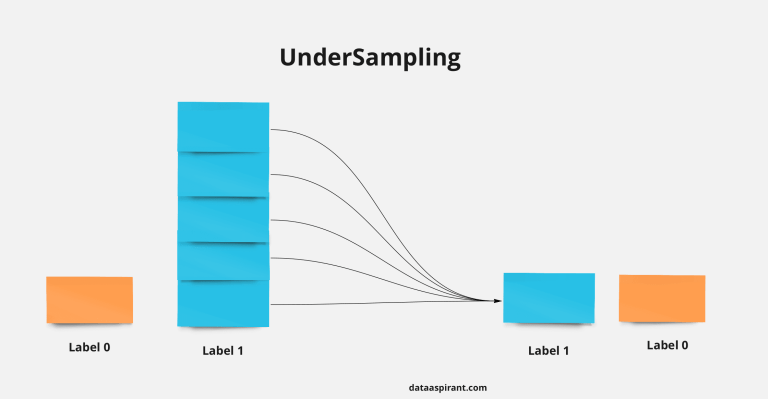

**Implementation Using Resample**

In [ ]:

# still using our separated classes fraud and not_fraud from above


not_fraud = df[df.Class==0]
fraud = df[df.Class==1]


# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

In [ ]:

# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [ ]:

accuracy_score(y_test, undersampled_pred)

In [ ]:

pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

In [ ]:

# # f1 score
# f1=f1_score(y_test, undersampled_pred)
# print('F1-Score is:',f1)
# # recall score
recall=recall_score(y_test, undersampled_pred)
print('Recall is:',recall)

We have achieved good **Recall**

## **Generate Synthetic Samples**: SMOTE







SMOTE(SMOTE or Synthetic Minority Oversampling Technique)
SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data

In [ ]:
# !pip install SMOTE

In [ ]:

# !pip install imbalanced-learn

In [ ]:

from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:

sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_sample(X_train1, y_train1)

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train1, y_train1)

smote_pred = smote.predict(X_test1)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

In [ ]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

###Let's Build A **Random Forest Algorithm** On The New **Balanced Data** To See The Results:

In [ ]:
#@title

from sklearn.ensemble import RandomForestClassifier

In [ ]:


randf = RandomForestClassifier(n_estimators=10).fit(X_train1, y_train1)

# predict on test set
randf_pred = randf.predict(X_test1)

accuracy_score(y_test1, randf_pred)

In [ ]:

pd.DataFrame(confusion_matrix(y_test1, randf_pred))

In this case **SMOTE** is not working for us, we will therefore consider *Upsampling* and *Downsampling* in dealing with imbalance data.


**Note:** Every dataset is different and what worked for one dataset might not work exactly the same way for all datasets. For example **SMOTE** might work very well on a different dataset while **Upsampling** or **Downsampling** might not perform good. 

It is therefore advisable to consider all these strategies and select the one that works best for your dataset.